### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits


### Importing the dataset and checking the number of rows and columns

In [2]:
mnist = load_digits()
print(mnist.data.shape)

(1797, 64)


In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
X, y = mnist["data"], mnist["target"]
np.array(mnist.data)

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
y.shape

(1797,)

### Visualizing the dataset

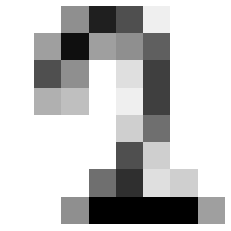

In [48]:
some_digit = X[1400]
some_digit_image = some_digit.reshape(8, 8)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")


plt.show()

In [49]:
y[1400]

2

### Test-Train Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(mnist.data),mnist.target,test_size=0.20,random_state=42)

### Size of training data and testing data

In [9]:
X_train.shape

(1437, 64)

In [10]:
y_train.shape

(1437,)

### Function to print results from the cross validation training set

In [11]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

### Importing the libraries required for Cross Validation and Support Vector Machine Classifier

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


### Hyperparameter tuning on the Support Vector Machine Classifier

In [13]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'C': 10, 'kernel': 'rbf'}

0.971 (+/-0.017) for {'C': 0.1, 'kernel': 'linear'}
0.948 (+/-0.021) for {'C': 0.1, 'kernel': 'rbf'}
0.971 (+/-0.017) for {'C': 1, 'kernel': 'linear'}
0.986 (+/-0.012) for {'C': 1, 'kernel': 'rbf'}
0.971 (+/-0.017) for {'C': 10, 'kernel': 'linear'}
0.992 (+/-0.008) for {'C': 10, 'kernel': 'rbf'}


### Saving the parameters that are best fit for the model

In [14]:
svc_best = cv.best_estimator_

### Predicting the testing dataset and ploting the confusion matrix

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
svc_best_predict = svc_best.predict(X_test)
conf_mx_svc = confusion_matrix(y_test, svc_best_predict)
conf_mx_svc

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 39]], dtype=int64)

### Analyzing confusion matrix to gain new insights

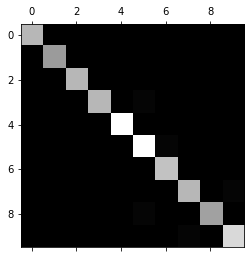

In [16]:
plt.matshow(conf_mx_svc, cmap=plt.cm.gray)
plt.show()


In [17]:
row_sums = conf_mx_svc.sum(axis=1, keepdims=True)
norm_conf_mx_svc = conf_mx_svc / row_sums

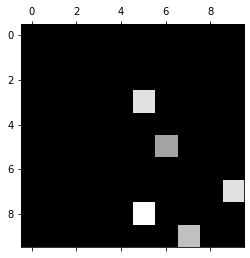

In [18]:
np.fill_diagonal(norm_conf_mx_svc, 0)
plt.matshow(norm_conf_mx_svc, cmap=plt.cm.gray)
plt.show()

### Importing the required library for Multi Level Perceptron

In [19]:
from sklearn.neural_network import MLPClassifier

### Implementing MLP and tuning the hyperparameters

In [20]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv_mlp = GridSearchCV(mlp, parameters, cv=5)
cv_mlp.fit(X_train,y_train)
print_results(cv)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

BEST PARAMS: {'C': 10, 'kernel': 'rbf'}

0.971 (+/-0.017) for {'C': 0.1, 'kernel': 'linear'}
0.948 (+/-0.021) for {'C': 0.1, 'kernel': 'rbf'}
0.971 (+/-0.017) for {'C': 1, 'kernel': 'linear'}
0.986 (+/-0.012) for {'C': 1, 'kernel': 'rbf'}
0.971 (+/-0.017) for {'C': 10, 'kernel': 'linear'}
0.992 (+/-0.008) for {'C': 10, 'kernel': 'rbf'}


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Saving the best hyperparameters for the model

In [21]:
mlp_best = cv_mlp.best_estimator_

### Predicting the test dataset and ploting the confusion matrix for MLP Classifier

In [22]:
mlp_best_predict = mlp_best.predict(X_test)
conf_mx_mlp = confusion_matrix(y_test, mlp_best_predict)
conf_mx_mlp

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 44,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 39]], dtype=int64)

### Analyzing the confusion matrix to gain insights

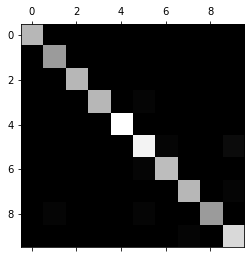

In [23]:
plt.matshow(conf_mx_mlp, cmap=plt.cm.gray)
plt.show()

In [24]:
row_sums = conf_mx_mlp.sum(axis=1, keepdims=True)
norm_conf_mx_mlp = conf_mx_mlp / row_sums

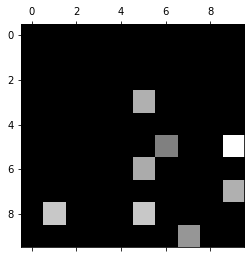

In [25]:
np.fill_diagonal(norm_conf_mx_mlp, 0)
plt.matshow(norm_conf_mx_mlp, cmap=plt.cm.gray)
plt.show()

### Implementing Random Forest Classifier and tuning the hyperparameters

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv_rf = GridSearchCV(rf, parameters, cv=5)
cv_rf.fit(X_train, y_train)

print_results(cv_rf)

BEST PARAMS: {'max_depth': 32, 'n_estimators': 250}

0.602 (+/-0.149) for {'max_depth': 2, 'n_estimators': 5}
0.808 (+/-0.036) for {'max_depth': 2, 'n_estimators': 50}
0.825 (+/-0.05) for {'max_depth': 2, 'n_estimators': 250}
0.804 (+/-0.098) for {'max_depth': 4, 'n_estimators': 5}
0.908 (+/-0.028) for {'max_depth': 4, 'n_estimators': 50}
0.921 (+/-0.024) for {'max_depth': 4, 'n_estimators': 250}
0.896 (+/-0.065) for {'max_depth': 8, 'n_estimators': 5}
0.964 (+/-0.023) for {'max_depth': 8, 'n_estimators': 50}
0.967 (+/-0.023) for {'max_depth': 8, 'n_estimators': 250}
0.902 (+/-0.054) for {'max_depth': 16, 'n_estimators': 5}
0.966 (+/-0.027) for {'max_depth': 16, 'n_estimators': 50}
0.974 (+/-0.024) for {'max_depth': 16, 'n_estimators': 250}
0.898 (+/-0.038) for {'max_depth': 32, 'n_estimators': 5}
0.965 (+/-0.034) for {'max_depth': 32, 'n_estimators': 50}
0.976 (+/-0.016) for {'max_depth': 32, 'n_estimators': 250}
0.899 (+/-0.037) for {'max_depth': None, 'n_estimators': 5}
0.967 (+/-0.

### Saving the best hyperparameters

In [28]:
rf_best = cv_rf.best_estimator_

### Predicting the test dataset on the RF model and ploting the confusion matrix

In [29]:
rf_best_predict = rf_best.predict(X_test)
accuracy_score(y_test, rf_best_predict)
conf_mx_rf = confusion_matrix(y_test, rf_best_predict)
conf_mx_rf

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 38]], dtype=int64)

### Analyzing the confusion matrix to gain insights

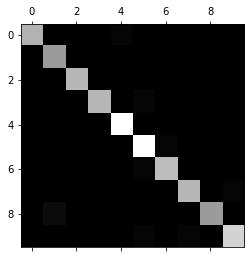

In [32]:
plt.matshow(conf_mx_rf, cmap=plt.cm.gray)
plt.show()

In [33]:
row_sums = conf_mx_rf.sum(axis=1, keepdims=True)
norm_conf_mx_rf = conf_mx_rf / row_sums

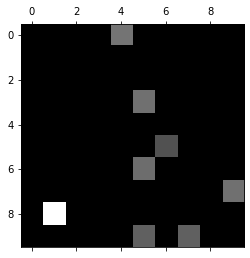

In [34]:
np.fill_diagonal(norm_conf_mx_rf, 0)
plt.matshow(norm_conf_mx_rf, cmap=plt.cm.gray)
plt.show()

### Importing Knn and implementing the model

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier()
parameters = {
    'n_neighbors': [1, 3, 5, 7, 9]
    
}

cv_knn = GridSearchCV(knn, parameters, cv=5)
cv_knn.fit(X_train,y_train)

print_results(cv_knn)

BEST PARAMS: {'n_neighbors': 1}

0.986 (+/-0.009) for {'n_neighbors': 1}
0.985 (+/-0.02) for {'n_neighbors': 3}
0.983 (+/-0.018) for {'n_neighbors': 5}
0.981 (+/-0.016) for {'n_neighbors': 7}
0.976 (+/-0.017) for {'n_neighbors': 9}


### Saving the best hyperparameters 

In [37]:
knn_best = cv_knn.best_estimator_

### Predicting the test dataset and confusion matrix

In [38]:
knn_best_predict = knn_best.predict(X_test)
accuracy_score(y_test, knn_best_predict)
conf_mx_knn = confusion_matrix(y_test, knn_best_predict)
conf_mx_knn

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 28,  1],
       [ 0,  0,  0,  1,  1,  1,  0,  0,  0, 37]], dtype=int64)

### Visualizing the dataset to gain insights

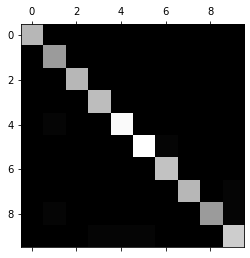

In [40]:
plt.matshow(conf_mx_knn, cmap=plt.cm.gray)
plt.show()

In [41]:
row_sums = conf_mx_knn.sum(axis=1, keepdims=True)
norm_conf_mx_knn = conf_mx_knn / row_sums

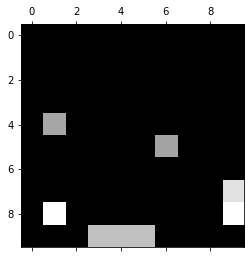

In [42]:
np.fill_diagonal(norm_conf_mx_knn, 0)
plt.matshow(norm_conf_mx_knn, cmap=plt.cm.gray)
plt.show()

### Visualizing the dataset by using dimensionality reduction techniques

In [43]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X_train)

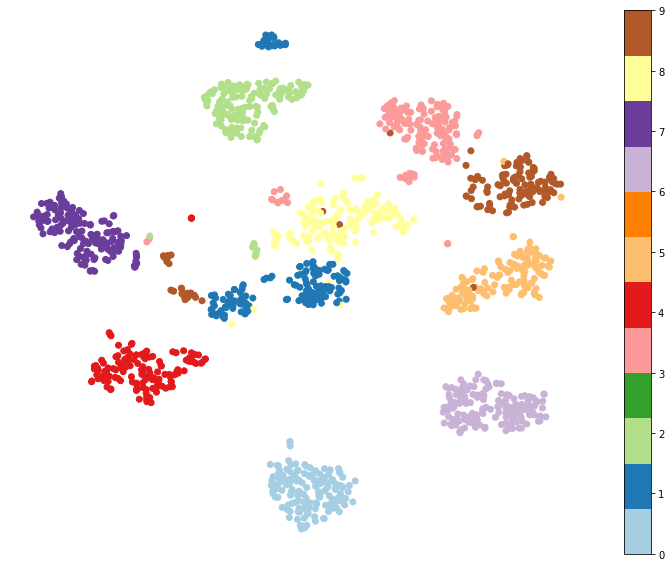

In [50]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap="Paired")
plt.axis('off')
plt.colorbar()
plt.show()

### Visualizing the dataset using PCA